In [1]:
# Features are types of proteins
# Target(s)/sample(s) are the cell(s)

In [2]:
# 7/24 Meeting Notes:
# Features: different channels
# Observations: cells
# Rename channels as proteins
# Look at the all of the proteins in the T cell populations --> combine this on the graph
# Leave out pSTAT5 --> group which cells are present given these populations, then colored based on pStat5
# Variables are proteins, obervations are cells
# CHange pstat5 color based on threshold --> pSTAT5
# In my data set, are cells or proteins the features?

# 7/29 Notes
# For gating in ckine --> take FCT gates, determine what the two proteins are in PCA coordinates --> use this
# method to determine sections instead of Kmeans
# Functions: think of functions like a verb, each one does one thing!!

In [3]:
### Import all necessary packages to run functions
import matplotlib
import numpy as np
import pandas
import scipy
import FlowCytometryTools
import pylab
import sys
import pathlib
import sklearn
from matplotlib import pyplot as plt
from pathlib import Path
from FlowCytometryTools import test_data_dir, test_data_file
from FlowCytometryTools import FCMeasurement
from matplotlib.backends.backend_pdf import PdfPages
from FlowCytometryTools import ThresholdGate, PolyGate, QuadGate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/usr/local/lib/python3.7/dist-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


In [4]:
# Import FCS files. Variable input: name of path name to file. 
def importF(pathname):
    # Declare arrays and int
    file = []
    sample = []
    z = 0
    # Read in user input for file path and assign to array file 
    pathlist = Path(r'' + str(pathname)).glob('**/*.fcs')
    for path in pathlist:
        path_in_str = str(path)
        file.append(path_in_str)
    # Go through each file and assign the file contents to entry in the array sample
    for entry in file:
        sample.append(FCMeasurement(ID = 'Test Sample' + str(z), datafile = entry))
        z+=1
    importF.sample = sample
    # Returns the array sample which contains data of each file in folder (one file per entry in array)
    return sample

What is the name of the T plate folder?: Tplate


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(23391,)
(23391, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(26510,)
(26510, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(25966,)
(25966, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(25603,)
(25603, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(25236,)
(25236, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/data.py:189: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


(26422,)
(26422, 1)


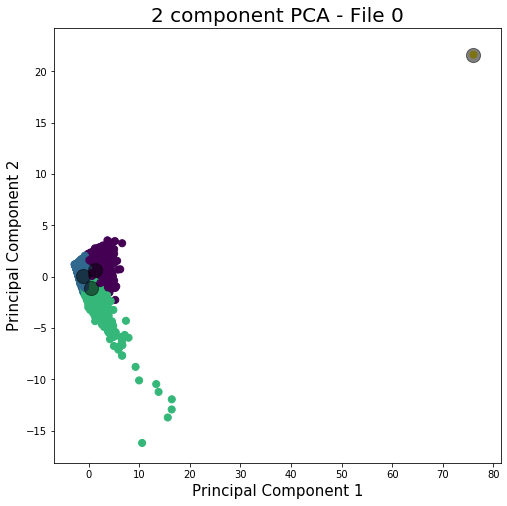

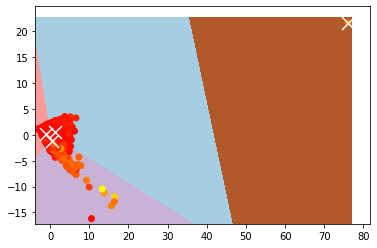

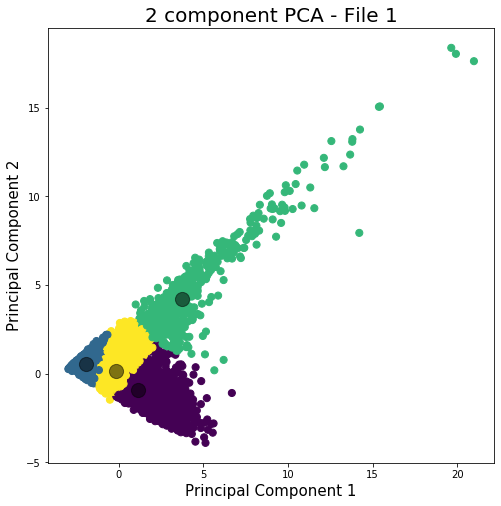

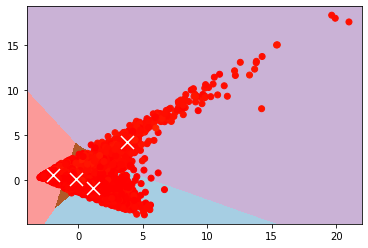

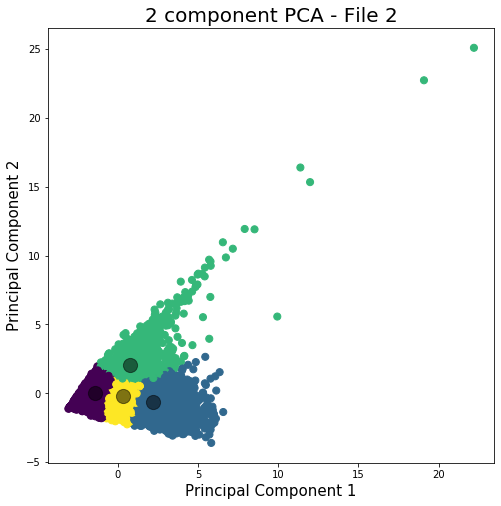

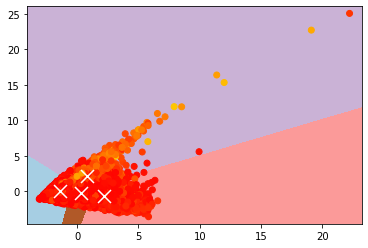

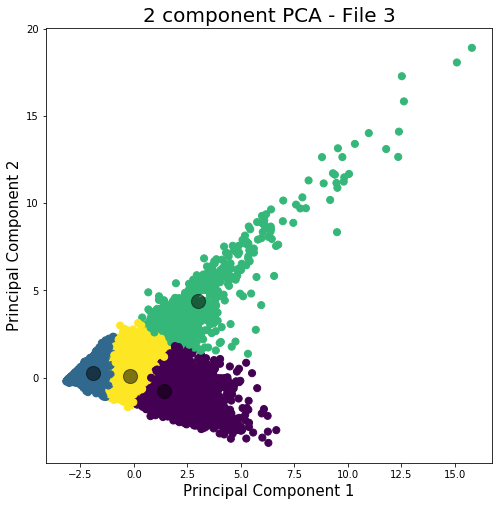

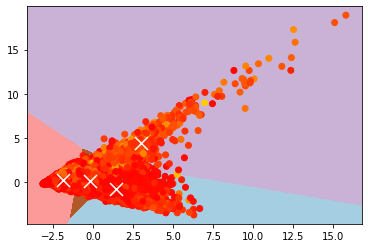

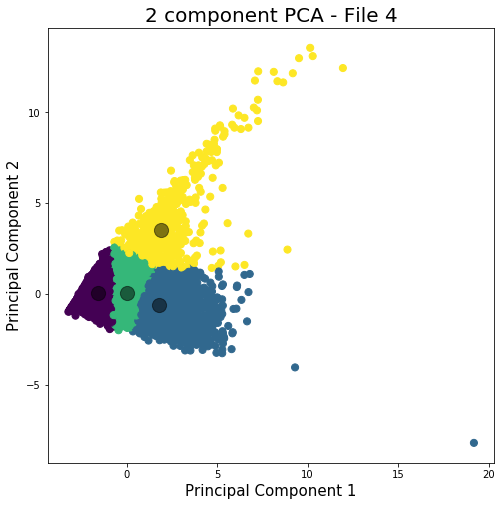

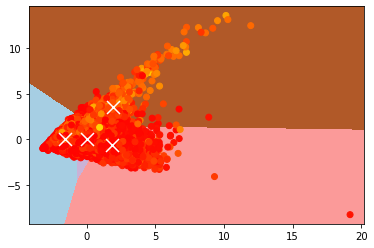

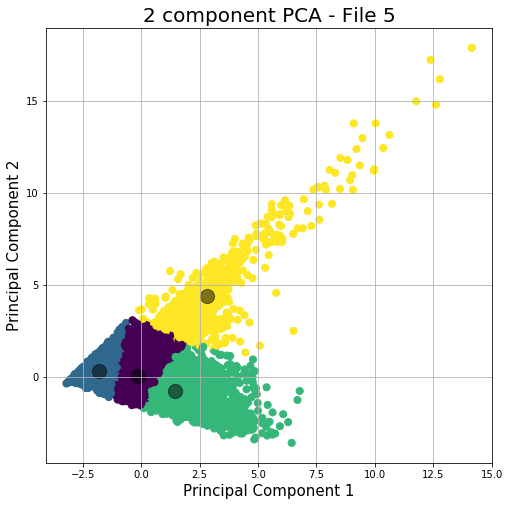

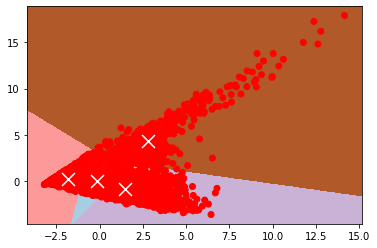

In [5]:
tsample = []
dataMat = []
principalDf = []
finalDf = []
score = []
kmeans = []
y_kmeans = []
x_kmeans = []
pstat = []
features = ['BL1-H','VL1-H', 'VL4-H', 'BL3-H']
from matplotlib import colors

tplate = input('What is the name of the T plate folder?:')
tsample = importF(tplate)

for i, item0 in enumerate(tsample):
    smpl = tsample[i]
    dataMat.append(smpl.data[['BL1-H', 'VL1-H', 'VL4-H', 'BL3-H']][0:])
    data = dataMat[i]
    pstat.append(smpl.data[['RL1-H']][0:])
    
    # setting values of data of selected features to data frame
    xi = data.loc[:,features].values
    # STANDARDIZE DATA --> very important to do before applying machine learning algorithm
    xs = sklearn.preprocessing.scale(xi)
    # setting how many components wanted --> PC1 and PC2
    pca = PCA(n_components=2)
    # apply PCA to standardized data set
    xf = pca.fit(xs).transform(xs)
    score.append(pca.fit_transform(xs))
    # These are the values for each cell on our new PC1 and PC2 axis graph
    principalDf.append(pandas.DataFrame(data = xf, columns = ['principal component 1', 'principal component 2']))
    
    #Categorize the different proteins -- four categories
    kmeans = sklearn.cluster.KMeans(n_clusters = 4)
    x_kmeans.append(kmeans.fit(xf))
    y_kmeans.append(kmeans.predict(xf))
    
    x = xf[:,0]
    y = xf[:,1]
    
    # Plotting PCA --> categorize individual points
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA - File '+str(i), fontsize = 20)
    plt.scatter(x, y, c=y_kmeans[i], s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
    
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     
    # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.clf()
    plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired,aspect='auto', origin='lower')
    
    #print(pstat[i])
    #print(type(cmap))
    #print(type(norm))
    #print(type(c = cmap(norm(pstat[i]))))
    
    #cmap = plt.cm.Spectral
    p_min = pstat[i].values.min()
    p_max = pstat[i].values.max()
    #print(pstat[i].values)
    #norm = plt.autoscale(pstat[i].values)
    #print(cmap(norm))
    pstat_data = pstat[i].values
    #norm = plt.Normalize(vmin=p_min, vmax=p_max)
    
    print(y.shape)
    print(pstat_data.shape)
    
    plt.scatter(x,y, c=np.squeeze(pstat_data), cmap = "autumn")
   
    #plt.plot(x, y, 'k.', markersize=2)
    
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=169, linewidths=3, color='w', zorder=10)
    

#ax.legend(targets)
ax.grid()
plt.show()